### 다중클래스분류 (Multi-Class Classification)
- 클래스가 여러개일 경우, 여러개의 이진 클래스 문제 <br>
(Binary-Class Classification)로 바꿔서 해결한다.
- OvO / OvR

##### 1. OvO (One-Vs-One)

- K개의 타겟 클래스, 2개씩 조합. K(K-1)/2개의 조합의 이진 클래스 분류 문제 풀기.
- 각각의 조합에 대해 특정 클래스에 속할 때 df값 계산. df값이 합쳐서 가장 큰 클래스 선택.

ex> 붓꽃 문제

- 0에 속한다 / 1에 속한다, 0에 속한다 / 2에 속한다, 1에 속한다 / 2에 속한다.<br>
-> 3*2 / 2 = 3개의 이진 클래스 분류 문제를 각각의 데이터마다 풀고 <br>
    df값을 더해서 가장 큰 클래스를 선택.

##### 2. OvR (One-Vs-Rest)

- K개의 타겟 클래스, 각각의 클래스에 '속한다/속하지 않는다' 의 이진 클래스 분류 문제 풀기.
- 특정 클래스에 속할 때 df값 계산. df값이 가장 큰 클래스 선택.

ex> 붓꽃 문제

- 0에 속한다 / 속하지 않는다, 1에 속한다 / 속하지 않는다, 3에 속한다 / 속하지 않는다.<br>
-> 3개의 이진 클래스 분류 문제를 각각의 데이터마다 풀고 <br>
   '속한다' 의  df값이 가장 큰 클래스에 데이터 배정

In [2]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
model1 = LogisticRegression().fit(iris.data, iris.target)
model2 = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target)
model3 = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)

### Plotting

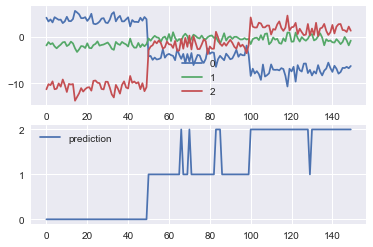

In [3]:
#기존분류모형
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(iris.data)).plot(ax=ax1) #df값 구한다.

ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(iris.data), columns=["prediction"]).plot(ax=ax2) #class 예측한다
plt.show()

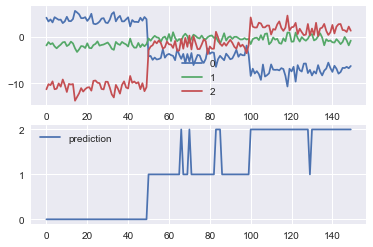

In [4]:
#OVR
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(iris.data)).plot(ax=ax1)

ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

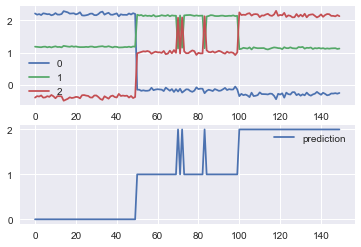

In [5]:
#OVO
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(iris.data)).plot(ax=ax1)

ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()